### 1. Naložite podatke iz datoteke v dataframe. Iz njega odstranite vse kategorične podatke. Številske podatke standardizirajte. Za nadaljnje analize boste potrebovali samo številske podatke.

In [252]:
import pandas as pd

df = pd.read_csv("university_rank_no_nan.csv",index_col="University", delimiter=";")
categorical_columns = df.select_dtypes(object).columns.tolist()
df.drop(columns=categorical_columns, inplace=True)
print(df.head())

                                       Number_students  \
University                                               
University of Oxford                            20.664   
California Institute of Technology               2.240   
University of Cambridge                         18.978   
Stanford University                             16.135   
Massachusetts Institute of Technology           11.247   

                                       Numb_students_per_Staff  Score_Result  \
University                                                                     
University of Oxford                                      11.2          95.4   
California Institute of Technology                         6.4          94.5   
University of Cambridge                                   10.9          94.4   
Stanford University                                        7.3          94.3   
Massachusetts Institute of Technology                      8.6          93.6   

                                

In [253]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])
print(df.head())

                                       Number_students  \
University                                               
University of Oxford                         -0.115104   
California Institute of Technology           -0.366056   
University of Cambridge                      -0.138069   
Stanford University                          -0.176793   
Massachusetts Institute of Technology        -0.243372   

                                       Numb_students_per_Staff  Score_Result  \
University                                                                     
University of Oxford                                 -0.461506      3.577682   
California Institute of Technology                   -0.746721      3.524553   
University of Cambridge                              -0.479332      3.518650   
Stanford University                                  -0.693243      3.512747   
Massachusetts Institute of Technology                -0.615997      3.471424   

                                

### 2. Da dobite približen vpogled na koliko gruč bi bilo najbolj optimalno deliti instance uporabite hierarhično gručenje in izrišite dendrogram z maksimalno delitvijo na 4 nivoje.


In [254]:
from scipy.cluster.hierarchy import linkage

linked = linkage(df, method='single')
linked

array([[1.22400000e+03, 1.25800000e+03, 1.20406885e-01, 2.00000000e+00],
       [1.13900000e+03, 1.16700000e+03, 1.71017855e-01, 2.00000000e+00],
       [7.26000000e+02, 7.35000000e+02, 1.82832443e-01, 2.00000000e+00],
       ...,
       [1.05000000e+03, 2.78400000e+03, 5.08786500e+00, 1.38600000e+03],
       [2.78700000e+03, 2.78800000e+03, 6.11852536e+00, 1.39500000e+03],
       [1.08400000e+03, 2.78900000e+03, 2.24273932e+01, 1.39600000e+03]])

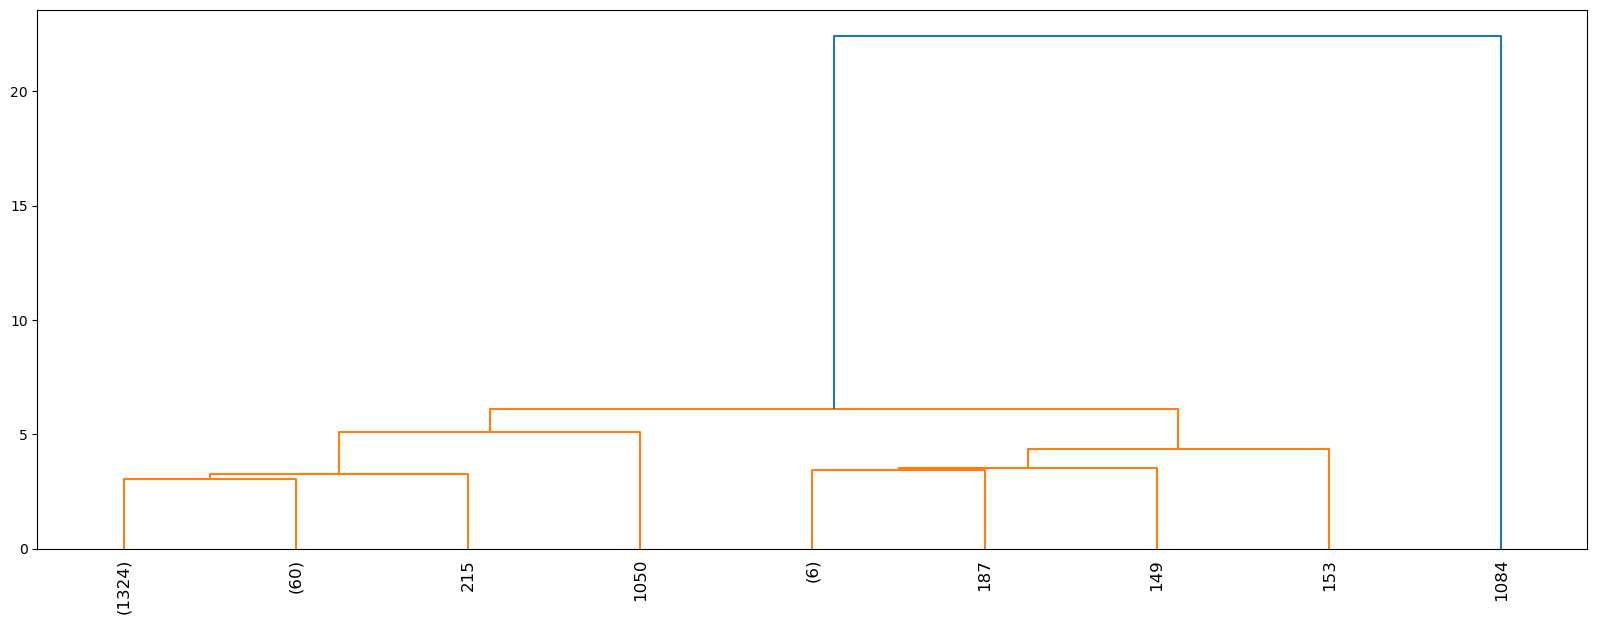

In [255]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           p=4,
           truncate_mode='level',
           leaf_rotation=90)

plt.show()

###  Izvedite gručenje z uporabo K-means algoritma. Algoritem naj razdeli instance v dve gruči. Izpišite koliko je instanc v posamezni gruči.

In [256]:
from sklearn.cluster import KMeans
import collections

kmeans = KMeans(n_clusters=2).fit(df)
print(collections.Counter(kmeans.labels_))

Counter({0: 964, 1: 432})


### 4. Naredite analizo koliko je optimalno število gruč pri uporabi K-means algoritma (preizkusite delitev na do 8 gruč) in izrišite graf po metodi komolca. Zapišite na koliko gruč je po vašem mnenju najbolj smiselno razdeliti instance.

In [257]:
inertia = {}

for k in range(1, 8):
  kmeans = KMeans(n_clusters=k).fit(df)
  inertia[k] = kmeans.inertia_

print(inertia)

{1: 15355.999999999998, 2: 10808.819047719764, 3: 9436.95624390012, 4: 8202.636980466268, 5: 7250.153172922279, 6: 6492.484249753783, 7: 5716.709305899249}


Text(0.5, 0, 'Število gruč')

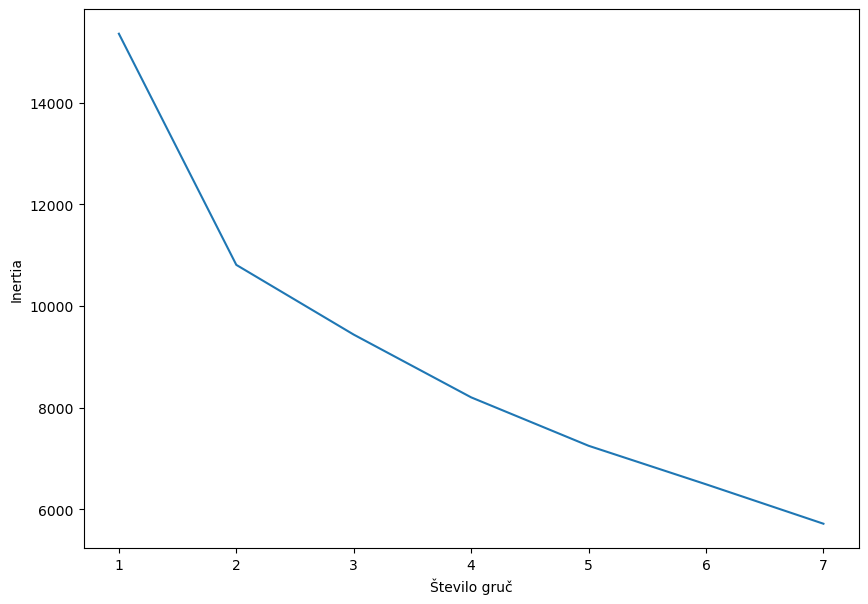

In [258]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.ylabel('Inertia')
plt.xlabel('Število gruč')

### 5. S pomočjo PCA transformacije naredite dva nova stolpca. Vrednosti iz teh dveh stolpcev prikažite v grafu raztrosa. Instance naj bodo obarvane glede na to, v katero gručo jih je razvrstil K-means algoritem. Uporabite rezultate k-means algoritma, ki po vašem mnenju razdeli instance v najbolj optimalno število gruč (iz 4. točke).

In [259]:
from sklearn.decomposition import PCA

df_transformed = PCA(n_components=2).fit_transform(df)
print(df_transformed[:5])

[[7.79683119 0.4389954 ]
 [7.77384863 1.53355057]
 [7.55576996 0.26949027]
 [7.08435012 1.1227002 ]
 [7.70370509 1.6046711 ]]


In [260]:
df_t = pd.DataFrame(df_transformed, columns=["First", "Second"])
df_t.head()

,First,Second
0,7.796831,0.438995
1,7.773849,1.533551
2,7.555770,0.269490
3,7.084350,1.122700
4,7.703705,1.604671


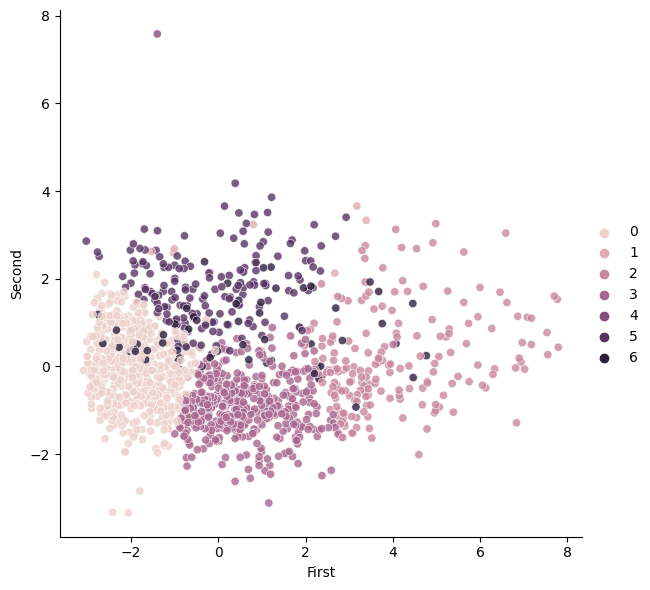

In [261]:
sns.relplot(x='First', y='Second', hue=kmeans.labels_, alpha=.8, height=6, data=df_t)

### 6. Naredite novo transformacijo številskih (še ne transformiranih podatkov) s pomočjo algoritma FastICA, s katero ustvarite dva nova stolpca . Na enak način kot v prejšnji točki izrišite graf raztrosa, le da tu uporabite vrednosti teh dveh novih stolpcev.


In [262]:
from sklearn.decomposition import  FastICA
df_FICA = FastICA(n_components=2).fit_transform(df)
print(df_FICA[:5])

df_t2 = pd.DataFrame(df_FICA, columns=["First", "Second"])
print(df_t2)

[[-0.07474388  0.05991991]
 [-0.09173824  0.04228799]
 [-0.06998342  0.06055109]
 [-0.07928421  0.04291496]
 [-0.09224509  0.04055317]]
         First    Second
0    -0.074744  0.059920
1    -0.091738  0.042288
2    -0.069983  0.060551
3    -0.079284  0.042915
4    -0.092245  0.040553
...        ...       ...
1391  0.029848 -0.017488
1392  0.029922 -0.018386
1393  0.032934 -0.017830
1394  0.028364 -0.025096
1395 -0.018531 -0.071545

[1396 rows x 2 columns]


/opt/homebrew/Caskroom/miniforge/base/envs/7_vaja/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


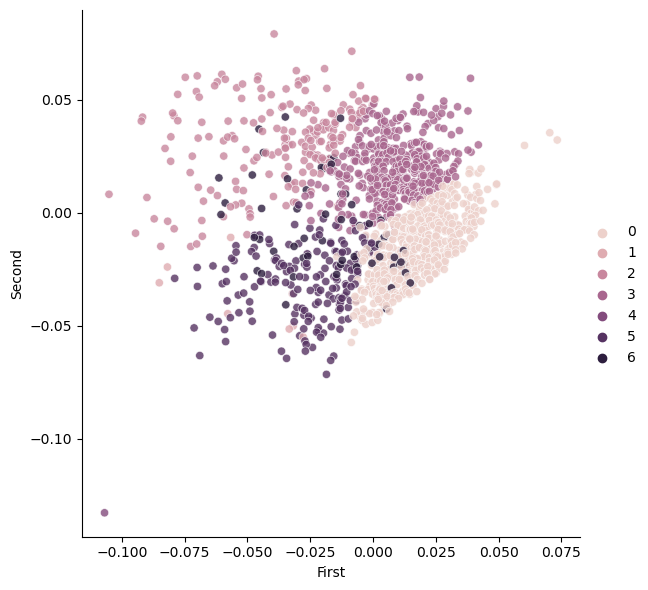

In [263]:
sns.relplot(x='First', y='Second', hue=kmeans.labels_, alpha=.8, height=6, data=df_t2)

### 7. Nad transformiranimi podatki iz 5. točke (z algoritmom PCA) izvedite gručenje z dvema poljubnima algoritmoma gručenja (npr. Birch, SpectralClustering, ...).  Algoritmom, ki zahtevajo predhodno določitev števila gruč, določite to število glede na najdeno optimalno vrednost iz 4. točke. Za oba izrišite graf raztrosa z obarvanimi instancami glede na pripadajočo gručo.

In [264]:
from sklearn.cluster import Birch
birch = Birch(branching_factor=2, threshold = 1).fit(df_t)
labels = birch.predict(df_t)
print(labels)

[0 0 0 ... 1 1 0]


In [265]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4).fit(df)
labels = sc.labels_
print(labels)

[2 2 2 ... 2 2 2]


/opt/homebrew/Caskroom/miniforge/base/envs/7_vaja/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(
